## Example Use of $\\\texttt{gw\_remnant}$ package
### with customized waveforms the user would like to use

to compute remant properties of binary black hole mergers given waveform generated from various models

Contact : Tousif Islam [tislam@umassd.edu]  [tousifislam24@gmail.com] 

### Import gw_remnant

In [1]:
import numpy as np
import sys
path_to_gwremnant = "../"
sys.path.append(path_to_gwremnant)
import gw_remnant
# we only need the GWRemnantCalculator
from gw_remnant.gw_remnant_calculator import GWRemnantCalculator

/Users/tousifislam/miniforge3/envs/kitp-py310/lib/python3.10/site-packages/gwtools/const.py:52: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


lal.MSUN_SI != Msun


In [2]:
help(GWRemnantCalculator)

Help on class GWRemnantCalculator in module gw_remnant.gw_remnant_calculator:

class GWRemnantCalculator(gw_remnant.gw_utils.gw_plotter.GWPlotter, gw_remnant.remnant_calculators.peak_luminosity_calculator.PeakLuminosityCalculator, gw_remnant.remnant_calculators.remnant_spin_calculator.AngularMomentumCalculator, gw_remnant.remnant_calculators.kick_velocity_calculator.LinearMomentumCalculator, gw_remnant.remnant_calculators.remnant_mass_calculator.RemnantMassCalculator, gw_remnant.remnant_calculators.initial_energy_momenta.InitialEnergyMomenta)
 |  GWRemnantCalculator(time, hdict, qinput, spin1_input=None, spin2_input=None, ecc_input=None, E_initial=None, L_initial=None, M_initial=1, use_filter=False)
 |  
 |  Calculator for remnant properties of binary black hole mergers.
 |  
 |  This class computes remnant properties and time evolution of physical quantities
 |  from gravitational waveform data. It combines functionality from multiple
 |  calculator classes to provide comprehensive an

### Load waveforms from a file
We basically need to have a time axis for a waveform and a dictionary containing all modes as input to $\\\texttt{gw\_remnant}$

In [3]:
data = np.load("q8_NR.npy", allow_pickle=True)

In [4]:
## mass ratio
q = 8

## create a waveform dictionary
wf = {}
for key in data.item():
    # get the time 
    if key=='t':
        time = data.item()[key]
    # get modes
    else:
        wf[key] = data.item()[key]

### Compute remant properties from waveforms

In [5]:
# calculate remnant properties
rnr = GWRemnantCalculator(time=time, hdict=wf, qinput=q)

### Print remnant properties

In [6]:
# remnant properties from NRHybSur3dq8 model
rnr.print_remnants()

Remnant Properties Summary
Mass ratio                    : 8.000
Initial mass                  : 1.00000000 M
Total energy radiated         : 0.01041062 M
Peak luminosity               : 0.00012866
Remnant mass                  : 0.98958938 M
Remnant spin (dimensionless)  : 0.30795092
Remnant kick velocity         : 0.00025646 c
Remnant kick velocity         : 76.88 km/s


In [7]:
# peak kick velocity
rnr.peak_kick

np.float64(0.00031875087803050965)

### Plot energy and momentum profiles

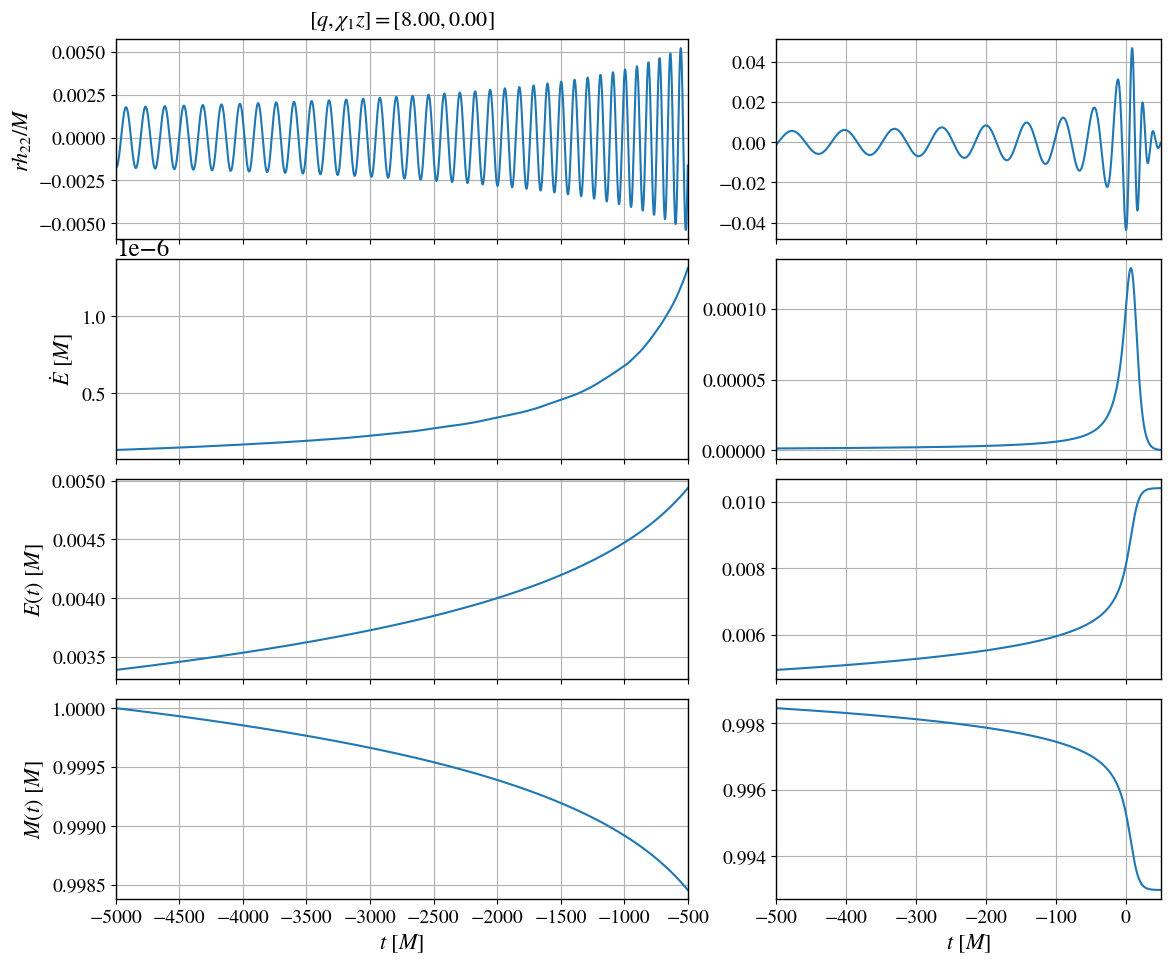

In [8]:
rnr.plot_mass_energy()

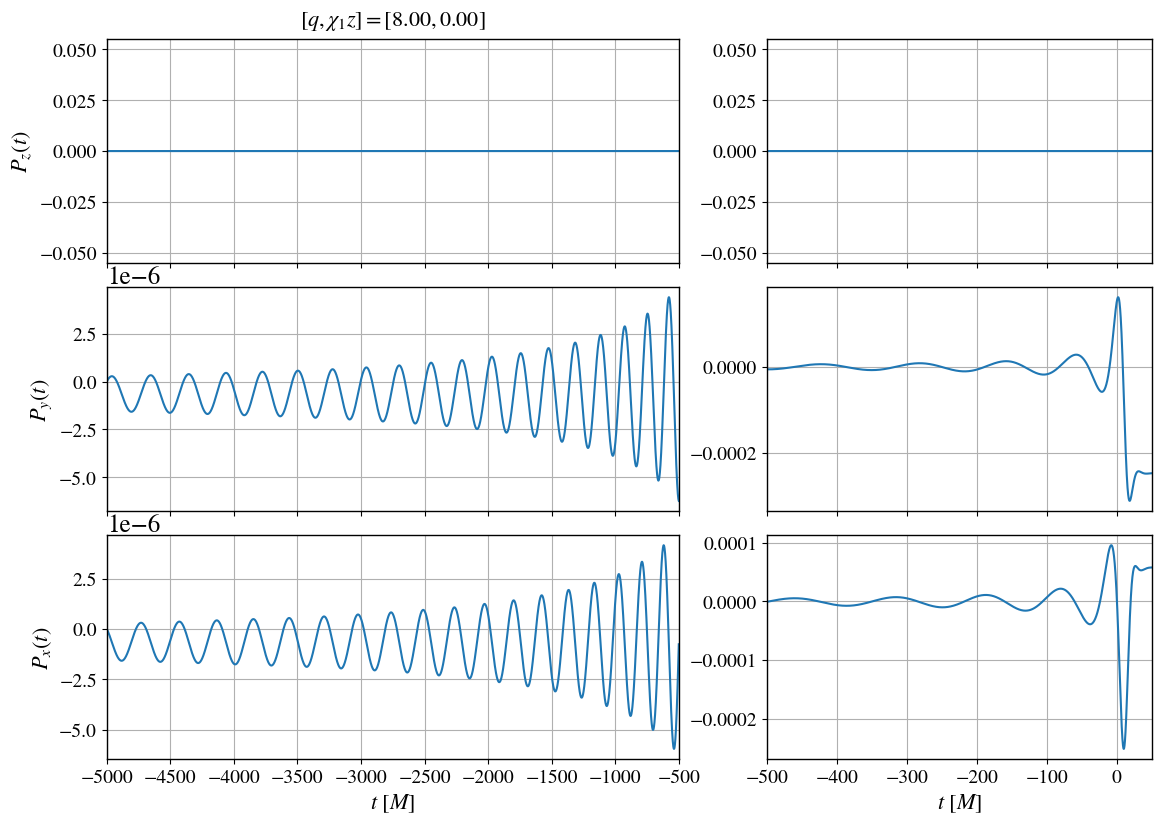

In [9]:
rnr.plot_linear_momentum()

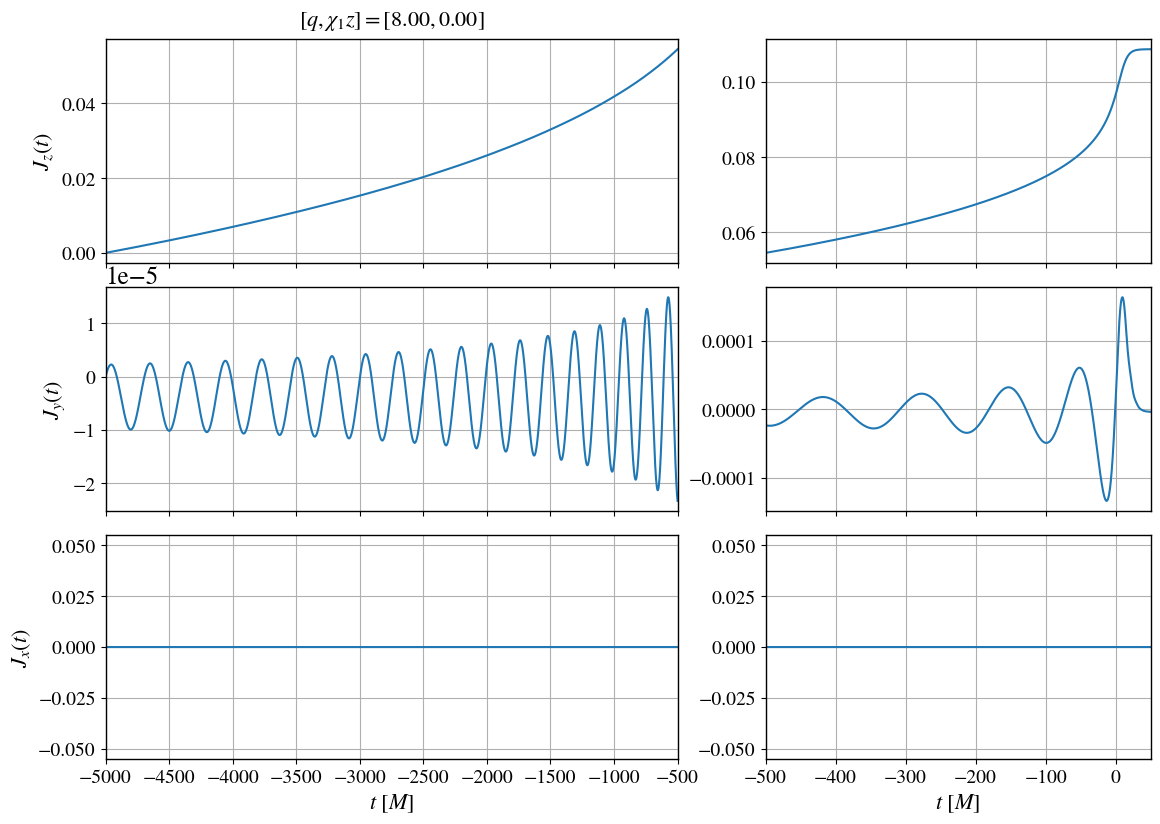

In [10]:
rnr.plot_angular_momentum()

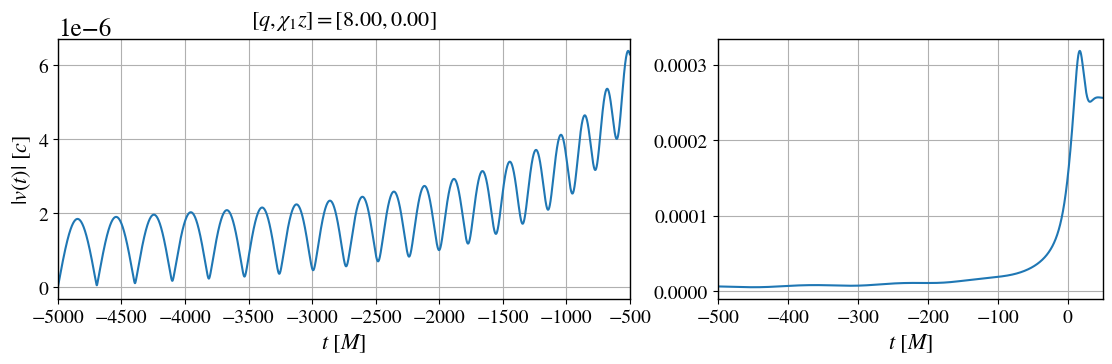

In [11]:
rnr.plot_kick_velocity()